   ##     <h1><center>PROJECT: MENTAL HEALTH DATA ANALYSIS</center></h1>                                               
                                                                                             
                                                                                             
                                                                 - Srishti P A (UIN: 01095922)
                                                                 - Shreya V (UIN: 01114390)
                                  

## <h2>OUTCOME: Best Model to detect whether the employees need treatment</h2>

### SOURCE OF DATASET: https://www.kaggle.com/osmi/mental-health-in-tech-survey

## Data Cleaning/ Exploratory Data Analysis/ Data PreProcessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('survey.csv')

In [3]:
data.shape

(1259, 27)

## SIZE OF DATA SET: 1259 rows and 27 columns

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [6]:
## To check the null values in each column
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

#### Data Cleaning

In [7]:
# Droping the column 'Timestamp' as we dont require at what time the record has been collected/inserted/updated
data.drop(columns=['Timestamp'],inplace=True)

In [8]:
## Droping the column 'Comments' as column is having only 13% of data and other 87% of data is missing
data.drop(columns=['comments'],inplace=True)

In [9]:
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [10]:
data.loc[data.Country=='Canada',['Country','state']]

,Country,state
2,Canada,NaN
7,Canada,NaN
9,Canada,NaN
14,Canada,NaN
36,Canada,NaN
42,Canada,NaN
48,Canada,NaN
59,Canada,NaN
64,Canada,NaN
71,Canada,NaN


In [11]:
data.loc[data.Country=='United Kingdom',['Country','state']]

,Country,state
3,United Kingdom,NaN
16,United Kingdom,NaN
29,United Kingdom,NaN
30,United Kingdom,NaN
32,United Kingdom,NaN
40,United Kingdom,NaN
46,United Kingdom,NaN
62,United Kingdom,NaN
73,United Kingdom,NaN
75,United Kingdom,NaN


In [12]:
data.drop(columns=['state'],inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null object
mental_health_consequence    1259 non-null object
phys_health_consequence      1259 non-null ob

In [14]:
#Droping null values for column 'self_employed' as there were only 18 records missing
data.dropna(subset=['self_employed'],inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1241 non-null int64
Gender                       1241 non-null object
Country                      1241 non-null object
self_employed                1241 non-null object
family_history               1241 non-null object
treatment                    1241 non-null object
work_interfere               977 non-null object
no_employees                 1241 non-null object
remote_work                  1241 non-null object
tech_company                 1241 non-null object
benefits                     1241 non-null object
care_options                 1241 non-null object
wellness_program             1241 non-null object
seek_help                    1241 non-null object
anonymity                    1241 non-null object
leave                        1241 non-null object
mental_health_consequence    1241 non-null object
phys_health_consequence      1241 non-null o

In [16]:
data.work_interfere.value_counts()

Sometimes    458
Never        207
Rarely       170
Often        142
Name: work_interfere, dtype: int64

In [17]:
## filling na values for the column 'work_interfere' with most common value 
data['work_interfere'] = data['work_interfere'].fillna(value='Sometimes')

In [18]:
data.work_interfere.value_counts()

Sometimes    722
Never        207
Rarely       170
Often        142
Name: work_interfere, dtype: int64

In [19]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1241 non-null int64
Gender                       1241 non-null object
Country                      1241 non-null object
self_employed                1241 non-null object
family_history               1241 non-null object
treatment                    1241 non-null object
work_interfere               1241 non-null object
no_employees                 1241 non-null object
remote_work                  1241 non-null object
tech_company                 1241 non-null object
benefits                     1241 non-null object
care_options                 1241 non-null object
wellness_program             1241 non-null object
seek_help                    1241 non-null object
anonymity                    1241 non-null object
leave                        1241 non-null object
mental_health_consequence    1241 non-null object
phys_health_consequence      1241 non-null 

## Finally all the null values was handled

In [21]:
data.describe()

,Age
count,1.241000e+03
mean,8.058021e+07
std,2.838665e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [22]:
print('Mean-->',data.Age.mean())
print('Median-->',data.Age.median())
print('Mode-->',data.Age.mode())
print('Standard Deviation', data.Age.std())

Mean--> 80580208.0
Median--> 31.0
Mode--> 0    29
dtype: int64
Standard Deviation 2838664778.11705


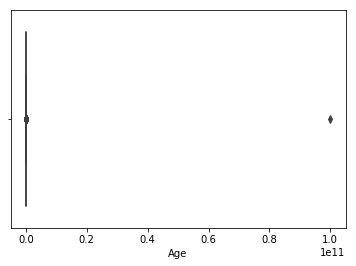

In [23]:
sb.boxplot(data.Age)

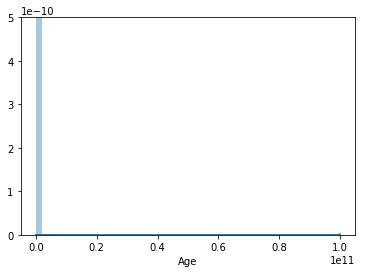

In [24]:
sb.distplot(data.Age)

In [25]:
data.loc[(data.Age>70) | (data.Age<10),'Age']

143             -29
364             329
390     99999999999
715           -1726
734               5
989               8
1127             -1
1182             72
Name: Age, dtype: int64

## From above observations we can clearly tell that Outliers exists in the Age Column

In [26]:
##Droping the Outliers
data.drop(data[(data.Age>70) | (data.Age<10)].index,inplace=True)

In [27]:
data.describe()

,Age
count,1233.000000
mean,32.012165
std,7.240916
min,11.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


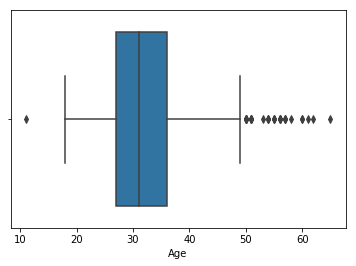

In [28]:
sb.boxplot(data.Age)

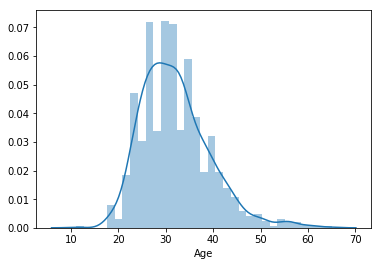

In [29]:
sb.distplot(data.Age)

In [30]:
## Now lets calculate the Zscore for the column 'Age'
age_std = np.std(data.Age)
age_mean = np.mean(data.Age)

In [31]:
zscore_age = [] #The z score tells you how many standard deviations from the mean your score is
for i in data.Age:
    zscore_age.append((i-age_mean)/age_std)

In [32]:
zscore_age

[1.9325608941143286,
 0.550959698287247,
 -0.41616113879171,
 -0.13984089962629373,
 1.9325608941143286,
 1.2417602962007879,
 0.13647933953912258,
 0.41279957870453887,
 0.13647933953912258,
 0.41279957870453887,
 0.27463945912183074,
 0.6891198178699552,
 -0.0016807800435855774,
 -0.13984089962629373,
 -0.2780010192090019,
 1.379920415783496,
 1.1036001766180796,
 -0.6924813779571264,
 -0.41616113879171,
 0.8272799374526634,
 2.4852013724451614,
 0.41279957870453887,
 -1.1069617367052509,
 0.41279957870453887,
 -0.6924813779571264,
 -1.9359224542014997,
 -0.2780010192090019,
 0.8272799374526634,
 -0.5543212583744181,
 0.27463945912183074,
 -0.8306414975398345,
 -0.2780010192090019,
 -1.3832819758706671,
 0.13647933953912258,
 -0.13984089962629373,
 -0.0016807800435855774,
 -0.5543212583744181,
 -0.6924813779571264,
 -0.0016807800435855774,
 -1.1069617367052509,
 -0.8306414975398345,
 0.13647933953912258,
 1.6562406549489121,
 -0.8306414975398345,
 -0.6924813779571264,
 -0.83064149753

In [33]:
data['zscore_age'] = zscore_age

In [34]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,zscore_age
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,1.932561
19,36,Male,France,Yes,Yes,No,Sometimes,6-25,Yes,Yes,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,0.550960
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,-0.416161
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,-0.139841
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,1.932561


In [35]:
data.loc[((data.zscore_age>3) | (data.zscore_age<-3)),['Age','zscore_age']]

,Age,zscore_age
294,56,3.314162
297,60,3.866803
347,54,3.037842
372,55,3.176002
419,55,3.176002
466,57,3.452322
471,58,3.590482
475,57,3.452322
498,54,3.037842
520,62,4.143123


In [36]:
data.loc[((data.zscore_age>2.8) & (data.zscore_age<3.0)),['Age']]

,Age
911,53


In [37]:
data.loc[(data.zscore_age>3.0),['Age']]=53

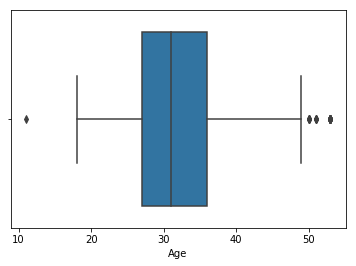

In [38]:
sb.boxplot(data.Age)

In [39]:
data.drop(data[data.Age==11].index,inplace=True)

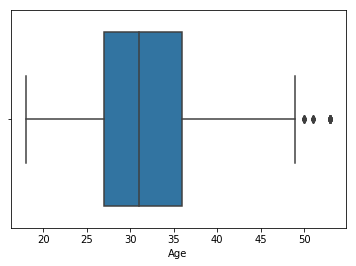

In [40]:
sb.boxplot(data.Age)

In [41]:
data.drop(columns=['zscore_age'],inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null object
Country                      1232 non-null object
self_employed                1232 non-null object
family_history               1232 non-null object
treatment                    1232 non-null object
work_interfere               1232 non-null object
no_employees                 1232 non-null object
remote_work                  1232 non-null object
tech_company                 1232 non-null object
benefits                     1232 non-null object
care_options                 1232 non-null object
wellness_program             1232 non-null object
seek_help                    1232 non-null object
anonymity                    1232 non-null object
leave                        1232 non-null object
mental_health_consequence    1232 non-null object
phys_health_consequence      1232 non-null 

In [43]:
data.describe()

,Age
count,1232.000000
mean,31.963474
std,6.995377
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,53.000000


In [44]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [45]:
data.Country.value_counts()

United States             734
United Kingdom            182
Canada                     68
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Finland                     3
Russia                      3
Bulgaria                    3
Mexico                      3
Portugal                    2
Denmark                     2
Croatia                     2
Greece                      2
Colombia                    2
Japan                       1
Romania                     1
Philippines                 1
Moldova                     1
Latvia    

In [46]:
data.Gender.value_counts()

Male                                              602
male                                              203
Female                                            117
M                                                 114
female                                             60
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Female                                              2
Female (trans)                                      2
Man                                                 2
Cis Male                                            2
cis male                                            1
Mal                                                 1
woman                                               1
Enby                        

In [47]:
data.loc[data.Gender == 'male',['Gender']] = 'Male'
data.loc[((data.Gender == 'm')|(data.Gender == 'M')),['Gender']] = 'Male'
data.loc[data.Gender == 'female',['Gender']] = 'Female'
data.loc[((data.Gender == 'f') | (data.Gender == 'F')),['Gender']] = 'Female'

In [48]:
data.loc[((data.Gender == 'Woman')|(data.Gender == 'woman')),['Gender']] = 'Female'

In [49]:
data.Gender.value_counts()

Male                                              953
Female                                            234
Make                                                4
Male                                                3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Male (CIS)                                          1
cis male                                            1
Mal                                                 1
femail                                              1
cis-female/femme                                    1
Enby                                                1
Trans-female                                        1
non-binary                                          1
Agender                                             1
Genderqueer                                         1
Guy (-ish) ^_^              

In [50]:
data.loc[((data.Gender == 'ostensibly male, unsure what that really means') | (data.Gender=='Androgyne')| (data.Gender=='Neuter') | (data.Gender=='Trans-female') | (data.Gender=='non-binary')|(data.Gender=='Female (trans)') | (data.Gender=='Enby')),['Gender']] = 'Trans'
data.loc[((data.Gender == 'cis-female/femme')| (data.Gender == 'Agender')),['Gender']] = 'Trans'

In [51]:
data.Gender.value_counts()

Male                        953
Female                      234
Trans                        10
Make                          4
Male                          3
Man                           2
Female                        2
Cis Male                      2
cis male                      1
Malr                          1
Male (CIS)                    1
msle                          1
Mal                           1
femail                        1
Genderqueer                   1
Guy (-ish) ^_^                1
Female (cis)                  1
Femake                        1
Mail                          1
Male-ish                      1
fluid                         1
Cis Female                    1
something kinda male?         1
Trans woman                   1
queer                         1
Cis Man                       1
queer/she/they                1
maile                         1
Nah                           1
male leaning androgynous      1
Name: Gender, dtype: int64

In [52]:
data['Gender']=data.Gender.str.strip()

In [53]:
data.Gender.value_counts()

Male                        956
Female                      236
Trans                        10
Make                          4
Man                           2
Cis Male                      2
Female (cis)                  1
Guy (-ish) ^_^                1
Genderqueer                   1
femail                        1
Mal                           1
cis male                      1
Malr                          1
Femake                        1
msle                          1
Male-ish                      1
Male (CIS)                    1
Mail                          1
fluid                         1
Cis Female                    1
something kinda male?         1
Trans woman                   1
queer                         1
Cis Man                       1
queer/she/they                1
maile                         1
Nah                           1
male leaning androgynous      1
Name: Gender, dtype: int64

In [54]:
data.loc[((data.Gender == 'Trans woman')| (data.Gender == 'Genderqueer') | (data.Gender == 'Cis Female') | (data.Gender == 'Cis Man')),['Gender']] = 'Trans'
data.loc[((data.Gender == 'Cis Male')| (data.Gender == 'Male (CIS)') | (data.Gender == 'Female (cis)') | (data.Gender == 'Guy (-ish) ^_^') | (data.Gender == 'queer') | (data.Gender == 'queer/she/they')),['Gender']] = 'Trans'
data.loc[((data.Gender == 'cis male') | (data.Gender == 'male leaning androgynous') | (data.Gender == 'Male-ish') | (data.Gender == 'something kinda male?')),['Gender']] = 'Trans'

In [55]:
data.loc[((data.Gender=='Make') | (data.Gender=='Mal')|(data.Gender=='Malr') | (data.Gender=='Mail') | (data.Gender=='Malr') | (data.Gender=='maile')),['Gender']]='Male'
data.loc[((data.Gender=='msle')|(data.Gender=='Man')),['Gender']]= 'Male'
data.loc[((data.Gender == 'Nah')|(data.Gender=='fluid')),['Gender']]= 'Trans'
data.loc[((data.Gender=='Femake')|(data.Gender=='femail')),['Gender']]='Female'

In [56]:
data.Gender.value_counts()

Male      967
Female    238
Trans      27
Name: Gender, dtype: int64

In [57]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,Yes,Yes,No,Sometimes,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [58]:
data.Country.value_counts()

United States             734
United Kingdom            182
Canada                     68
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Finland                     3
Russia                      3
Bulgaria                    3
Mexico                      3
Portugal                    2
Denmark                     2
Croatia                     2
Greece                      2
Colombia                    2
Japan                       1
Romania                     1
Philippines                 1
Moldova                     1
Latvia    

In [59]:
data.self_employed.value_counts()

No     1090
Yes     142
Name: self_employed, dtype: int64

In [60]:
data.family_history.value_counts()

No     751
Yes    481
Name: family_history, dtype: int64

In [61]:
data.treatment.value_counts()

Yes    622
No     610
Name: treatment, dtype: int64

In [62]:
data.work_interfere.value_counts()

Sometimes    719
Never        205
Rarely       170
Often        138
Name: work_interfere, dtype: int64

In [63]:
data.no_employees.value_counts()

6-25              283
26-100            283
More than 1000    280
100-500           172
1-5               156
500-1000           58
Name: no_employees, dtype: int64

In [64]:
data.remote_work.value_counts()

No     868
Yes    364
Name: remote_work, dtype: int64

In [65]:
data.tech_company.value_counts()

Yes    1009
No      223
Name: tech_company, dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null object
Country                      1232 non-null object
self_employed                1232 non-null object
family_history               1232 non-null object
treatment                    1232 non-null object
work_interfere               1232 non-null object
no_employees                 1232 non-null object
remote_work                  1232 non-null object
tech_company                 1232 non-null object
benefits                     1232 non-null object
care_options                 1232 non-null object
wellness_program             1232 non-null object
seek_help                    1232 non-null object
anonymity                    1232 non-null object
leave                        1232 non-null object
mental_health_consequence    1232 non-null object
phys_health_consequence      1232 non-null 

In [67]:
data.benefits.value_counts()

Yes           465
Don't know    400
No            367
Name: benefits, dtype: int64

In [68]:
data.care_options.value_counts()

No          492
Yes         434
Not sure    306
Name: care_options, dtype: int64

In [69]:
data.wellness_program.value_counts()

No            824
Yes           227
Don't know    181
Name: wellness_program, dtype: int64

In [70]:
data.seek_help.value_counts()

No            632
Don't know    355
Yes           245
Name: seek_help, dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 18 to 1258
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null object
Country                      1232 non-null object
self_employed                1232 non-null object
family_history               1232 non-null object
treatment                    1232 non-null object
work_interfere               1232 non-null object
no_employees                 1232 non-null object
remote_work                  1232 non-null object
tech_company                 1232 non-null object
benefits                     1232 non-null object
care_options                 1232 non-null object
wellness_program             1232 non-null object
seek_help                    1232 non-null object
anonymity                    1232 non-null object
leave                        1232 non-null object
mental_health_consequence    1232 non-null object
phys_health_consequence      1232 non-null 

In [72]:
#data.to_csv('Mental-Health-Cleaned-Data.csv',index=False)

In [73]:
data = pd.read_csv('Mental-Health-Cleaned-Data.csv')

In [74]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,36,Male,France,Yes,Yes,No,Sometimes,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


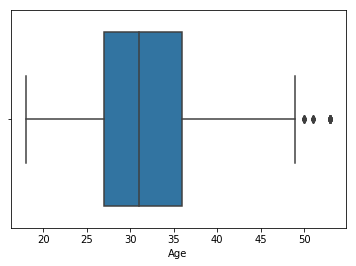

In [75]:
sb.boxplot(data.Age)

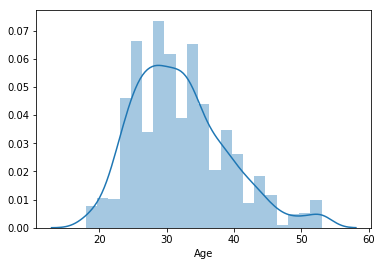

In [76]:
sb.distplot(data.Age)

#### Age Group Distribution

In [77]:
data['Age_group'] = pd.cut(data.Age,bins=[0,25,30,40,50,55],labels=['0-25','25-30','30-40','40-50','50-55'])

In [78]:
data['Age_group'].value_counts()

30-40    514
25-30    359
0-25     215
40-50    119
50-55     25
Name: Age_group, dtype: int64

Text(0.5, 1.0, 'Age Group Distribution')

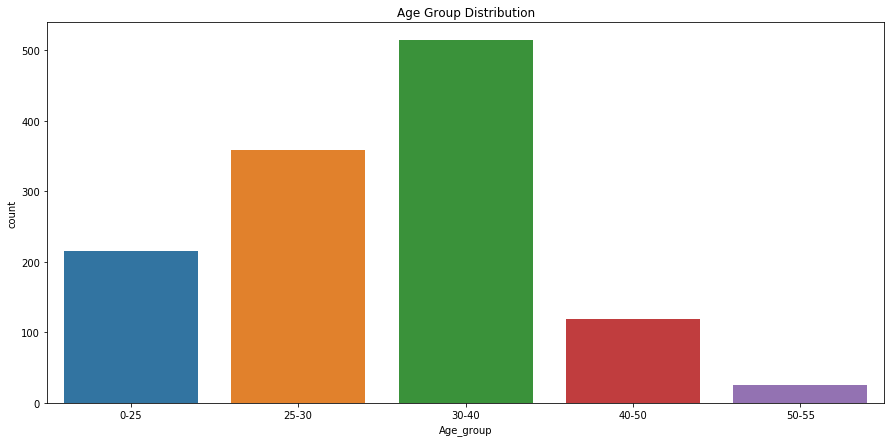

In [79]:
plt.figure(figsize=(15,7))
sb.countplot(data.Age_group)
plt.title('Age Group Distribution')

- Some Observations from above graph and values
    1. Employees with Age between 0-25 are 215
    2. Employees with Age between 25-30 are 359
    3. Employees with Age between 30-40 are 514
    4. Employees with Age between 40-50 are 119
    5. Employees with Age between 50-55 are 25

### Gender Distribution

In [80]:
data.Gender.value_counts()

Male      967
Female    238
Trans      27
Name: Gender, dtype: int64

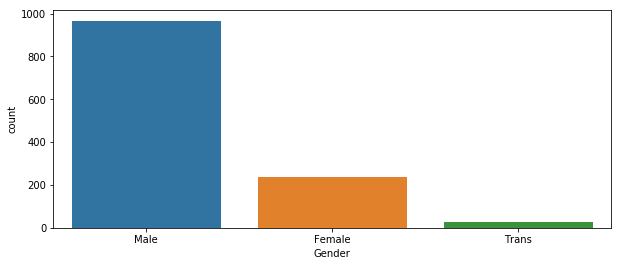

In [81]:
plt.figure(figsize=(10,4))
sb.countplot(data.Gender)

- Some Observations from above graph and values
    1. Employees with Gender Male are 967
    2. Employees with Gender Female are 238
    3. Employees with Gender Female are 27

#### Countplot for Country

In [82]:
data.Country.value_counts()

United States             734
United Kingdom            182
Canada                     68
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Poland                      7
Sweden                      7
Italy                       7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Finland                     3
Russia                      3
Bulgaria                    3
Mexico                      3
Portugal                    2
Denmark                     2
Croatia                     2
Greece                      2
Colombia                    2
Japan                       1
Romania                     1
Philippines                 1
Moldova                     1
Latvia    

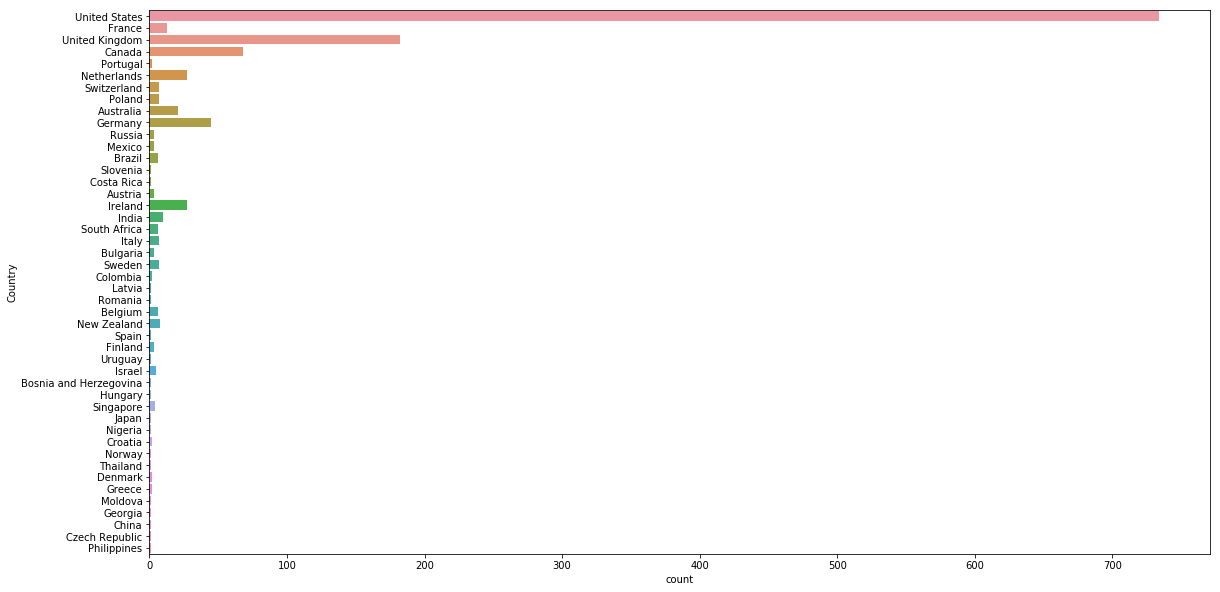

In [83]:
plt.figure(figsize=(19,10))
sb.countplot(y=data.Country)

- The Top 10 Countries from data are

   . United States             
   . United Kingdom            
   . Canada                    
   . Germany                   
   . Netherlands               
   . Ireland                   
   . Australia                 
   . France                    
   . India                     
   . New Zealand               

#### Treatment  Distribution

In [84]:
data.treatment.value_counts()

Yes    622
No     610
Name: treatment, dtype: int64

Text(0.5, 1.0, 'Treatment Distribution')

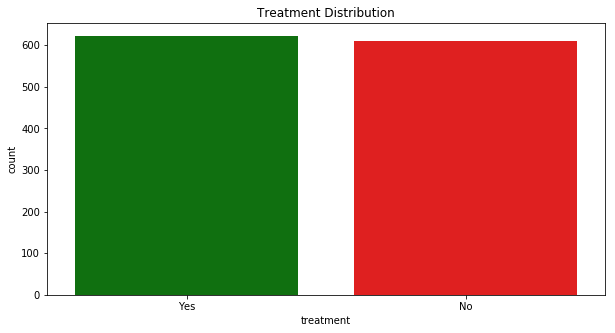

In [85]:
plt.figure(figsize=(10,5))
sb.countplot(data.treatment,order=['Yes','No'],palette=['Green','red'])
plt.title('Treatment Distribution')

#### Number of Employees

In [86]:
data.no_employees.value_counts()

6-25              283
26-100            283
More than 1000    280
100-500           172
1-5               156
500-1000           58
Name: no_employees, dtype: int64

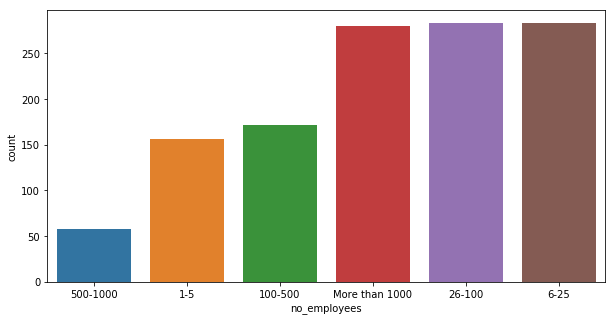

In [87]:
plt.figure(figsize=(10,5))
sb.countplot(data.no_employees,order=['500-1000','1-5','100-500','More than 1000','26-100','6-25'])

- Some observation from above graph and values 
    1. 156 Employees working in CompanySize between 1-5 employees
    2. 283 Employees working in CompanySize between 6-25 employees
    3. 283 Employees working in CompanySize between 26-100 employees
    4. 172 Employees working in CompanySize between 100-500 employees
    5. 58 Employees working in CompanySize between 500-1000 employees
    6. 280 Employees working in CompanySize between More than 1000 employees

#### Work Interfere Distribution 

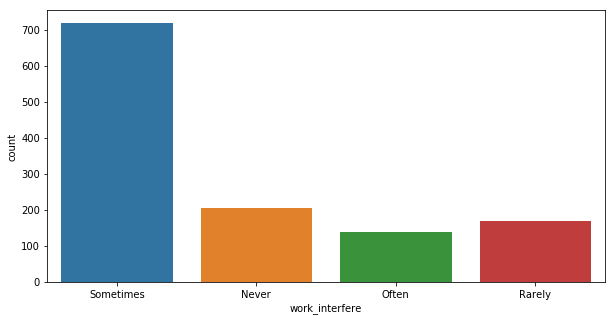

In [88]:
plt.figure(figsize=(10,5))
sb.countplot(data.work_interfere)

Text(0.5, 1.0, 'no_employee vs tech_company')

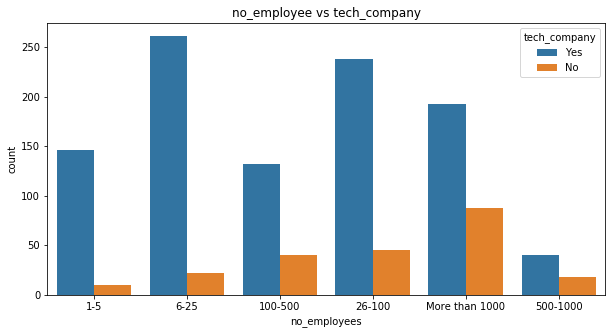

In [89]:
plt.figure(figsize=(10,5))
sb.countplot(x = data.no_employees, hue =data.tech_company)
plt.title('no_employee vs tech_company')

Text(0.5, 1.0, 'no_employee vs treatment')

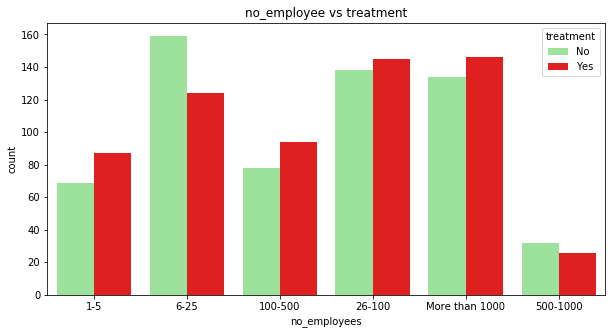

In [90]:
plt.figure(figsize=(10,5))
sb.countplot(x = data.no_employees, hue =data.treatment,palette=['LightGreen','Red'])
plt.title('no_employee vs treatment')

Text(0.5, 1.0, 'Age Group vs treatment')

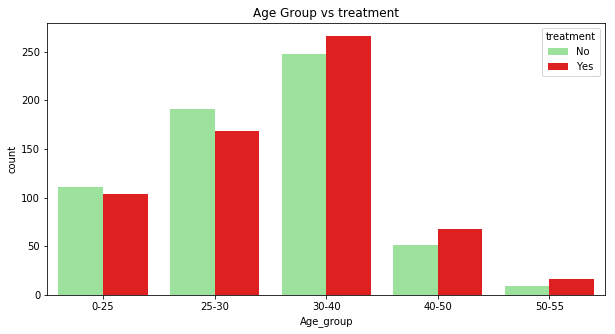

In [91]:
plt.figure(figsize=(10,5))
sb.countplot(x = data.Age_group, hue =data.treatment,palette=['LightGreen','Red'])
plt.title('Age Group vs treatment')

In [92]:
data = pd.read_csv('Mental-Health-Cleaned-Data.csv')
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,36,Male,France,Yes,Yes,No,Sometimes,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null object
Country                      1232 non-null object
self_employed                1232 non-null object
family_history               1232 non-null object
treatment                    1232 non-null object
work_interfere               1232 non-null object
no_employees                 1232 non-null object
remote_work                  1232 non-null object
tech_company                 1232 non-null object
benefits                     1232 non-null object
care_options                 1232 non-null object
wellness_program             1232 non-null object
seek_help                    1232 non-null object
anonymity                    1232 non-null object
leave                        1232 non-null object
mental_health_consequence    1232 non-null object
phys_health_consequence      1232 non-null o

### Data PreProcessing
#### Converting the categorical data to numerical data
     1. Assiging the values inplace of categorical data(Manually)
     2. LabelEncoder used for converting categorical data to numerical data(Automatic)

In [94]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [95]:
data.Gender.value_counts()

Male      967
Female    238
Trans      27
Name: Gender, dtype: int64

In [96]:
data.Gender[data.Gender == 'Male'] = 1 # Assiging value 1 to Gender as Male
data.Gender[data.Gender == 'Female'] = 0 # Assiging value 0 to Gender as Female
data.Gender[data.Gender == 'Trans'] = 2 # Assiging value 2 to Gender as Trans

In [97]:
data.Gender = pd.to_numeric(data.Gender)

In [98]:
data.Gender.value_counts()

1    967
0    238
2     27
Name: Gender, dtype: int64

In [99]:
data.Country = labelEncoder.fit_transform(data.Country)
labelEncoder.classes_

array(['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

In [100]:
data.self_employed = labelEncoder.fit_transform(data.self_employed)
labelEncoder.classes_

array(['No', 'Yes'], dtype=object)

In [101]:
data.family_history = labelEncoder.fit_transform(data.family_history)
labelEncoder.classes_

array(['No', 'Yes'], dtype=object)

In [102]:
data.work_interfere = labelEncoder.fit_transform(data.work_interfere)
labelEncoder.classes_

array(['Never', 'Often', 'Rarely', 'Sometimes'], dtype=object)

In [103]:
data.no_employees = labelEncoder.fit_transform(data.no_employees)
labelEncoder.classes_

array(['1-5', '100-500', '26-100', '500-1000', '6-25', 'More than 1000'],
      dtype=object)

In [104]:
data.remote_work= labelEncoder.fit_transform(data.remote_work)
labelEncoder.classes_

array(['No', 'Yes'], dtype=object)

In [105]:
data.tech_company = labelEncoder.fit_transform(data.tech_company)
labelEncoder.classes_

array(['No', 'Yes'], dtype=object)

In [106]:
data.benefits = labelEncoder.fit_transform(data.benefits)
labelEncoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

In [107]:
data.care_options = labelEncoder.fit_transform(data.care_options)
labelEncoder.classes_

array(['No', 'Not sure', 'Yes'], dtype=object)

In [108]:
data.wellness_program = labelEncoder.fit_transform(data.wellness_program)
labelEncoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

In [109]:
data.seek_help = labelEncoder.fit_transform(data.seek_help)
labelEncoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

In [110]:
data.anonymity = labelEncoder.fit_transform(data.anonymity)
labelEncoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

In [111]:
data.leave = labelEncoder.fit_transform(data.leave)
labelEncoder.classes_

array(["Don't know", 'Somewhat difficult', 'Somewhat easy',
       'Very difficult', 'Very easy'], dtype=object)

In [112]:
data.mental_health_consequence = labelEncoder.fit_transform(data.mental_health_consequence)
labelEncoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

In [113]:
data.phys_health_consequence = labelEncoder.fit_transform(data.phys_health_consequence)
labelEncoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

In [114]:
data.coworkers = labelEncoder.fit_transform(data.coworkers)
labelEncoder.classes_

array(['No', 'Some of them', 'Yes'], dtype=object)

In [115]:
data.supervisor = labelEncoder.fit_transform(data.supervisor)
labelEncoder.classes_

array(['No', 'Some of them', 'Yes'], dtype=object)

In [116]:
data.mental_health_interview = labelEncoder.fit_transform(data.mental_health_interview)
labelEncoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

In [117]:
data.phys_health_interview = labelEncoder.fit_transform(data.phys_health_interview)
labelEncoder.classes_

array(['Maybe', 'No', 'Yes'], dtype=object)

In [118]:
data.mental_vs_physical = labelEncoder.fit_transform(data.mental_vs_physical)
labelEncoder.classes_

array(["Don't know", 'No', 'Yes'], dtype=object)

In [119]:
data.obs_consequence = labelEncoder.fit_transform(data.obs_consequence)
labelEncoder.classes_

array(['No', 'Yes'], dtype=object)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null int64
Country                      1232 non-null int32
self_employed                1232 non-null int32
family_history               1232 non-null int32
treatment                    1232 non-null object
work_interfere               1232 non-null int32
no_employees                 1232 non-null int32
remote_work                  1232 non-null int32
tech_company                 1232 non-null int32
benefits                     1232 non-null int32
care_options                 1232 non-null int32
wellness_program             1232 non-null int32
seek_help                    1232 non-null int32
anonymity                    1232 non-null int32
leave                        1232 non-null int32
mental_health_consequence    1232 non-null int32
phys_health_consequence      1232 non-null int32
coworkers 

In [121]:
data['Treatment'] = data.treatment
data.drop(columns=['treatment'],inplace=True)

In [122]:
data.Treatment[data.Treatment == 'Yes'] = 1
data.Treatment[data.Treatment == 'No'] = 0
data.Treatment = pd.to_numeric(data.Treatment)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 24 columns):
Age                          1232 non-null int64
Gender                       1232 non-null int64
Country                      1232 non-null int32
self_employed                1232 non-null int32
family_history               1232 non-null int32
work_interfere               1232 non-null int32
no_employees                 1232 non-null int32
remote_work                  1232 non-null int32
tech_company                 1232 non-null int32
benefits                     1232 non-null int32
care_options                 1232 non-null int32
wellness_program             1232 non-null int32
seek_help                    1232 non-null int32
anonymity                    1232 non-null int32
leave                        1232 non-null int32
mental_health_consequence    1232 non-null int32
phys_health_consequence      1232 non-null int32
coworkers                    1232 non-null int32
supervisor 

In [124]:
data.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Treatment
0,46,1,44,1,1,3,0,1,1,2,...,4,1,1,2,2,1,2,2,1,0
1,36,1,14,1,1,3,4,1,1,1,...,2,1,1,1,1,0,0,0,0,0
2,29,1,44,0,1,3,1,0,1,2,...,1,0,1,1,1,1,1,1,0,1
3,31,1,44,1,0,0,0,1,1,1,...,1,1,1,1,1,1,0,2,0,0
4,46,1,44,0,0,1,2,1,1,2,...,0,0,1,1,2,1,0,1,0,1


In [125]:
#data.to_csv('Mental_Health_PreProcessed Data.csv',index=False)